# Installing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'data/organism_data_to_subset.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of       Unnamed: 0   GEM ID   Kingdom           Genus  \
0              1   iYO844  Bacteria        Bacillus   
1              2  iBB1018  Bacteria        Bacillus   
2              3   iYO844  Bacteria        Bacillus   
3              4  iBB1018  Bacteria        Bacillus   
4              5   iAF692   Archaea  Methanosarcina   
...          ...      ...       ...             ...   
6120        6121      NaN       NaN             NaN   
6121        6122      NaN       NaN             NaN   
6122        6123      NaN       NaN             NaN   
6123        6124      NaN       NaN             NaN   
6124        6125      NaN       NaN             NaN   

                         Species.strain              Citation       Source  \
0     subtilis subsp. subtilis str. 168                   NaN  BiGG iYO844   
1     subtilis subsp. subtilis str. 168  Blazquez et al. 2023       github   
2     subtilis subsp. subtilis str. 168                   NaN  BiGG iYO844 

In [3]:
# Adjust the plot to better visualize small abundance percentages by applying a logarithmic scale to the y-axis
import pandas as pd
import plotly.express as px

# Paths to the data files
abundance_file_path = 'data/species_abundance_filt.csv'
organism_subset_file_path = 'data/organism_data_to_subset.csv'

# Load both files
# species_abundance_filt.csv: This file contains abundance data for different species, 
# used to filter and visualize abundance patterns based on environmental variables such as soil pH.
# The column "taxon" in this file corresponds to "Species of interest" in organism_data_to_subset.csv,
# allowing the two datasets to be merged for visualization.
df_abundance = pd.read_csv(abundance_file_path)

# organism_data_to_subset.csv: This file contains information on environmental preferences for various species,
# such as soil pH preference. The column "Species of interest" in this file aligns with "taxon" in
# species_abundance_filt.csv, enabling filtering and visualization based on specific environmental preferences.
df_to_subset = pd.read_csv(organism_subset_file_path)

# Specify the target species name
species_name = "Deltaproteobacteria bacterium"

# Merge data on species name to include 'percentage' from abundance data
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)
print(df_abundance.shape)
print(df_to_subset.shape)
print(merged_data.shape)
# Filter for the target species
single_species_obs = merged_data[merged_data['Species of interest'] == species_name]

# Check for 'percentage' column and plot
if 'soilInCaClpH' in single_species_obs.columns and 'percentage' in single_species_obs.columns:
    # Create a scatter plot for soil pH against abundance with logarithmic y-axis scale
    print(single_species_obs)
    fig = px.scatter(
        single_species_obs,
        x='soilInCaClpH',  # Soil pH preference on the x-axis
        y='percentage',     # Abundance on the y-axis, with a small scale
        title=f"Soil pH Preference vs. Abundance for {species_name} (Log Scale)",
        labels={'pH_preference': 'Soil pH Preference', 'percentage': 'Abundance (%)'},
        hover_name='Species of interest',
        log_y=True  # Apply logarithmic scale to the y-axis for better visualization of small values
    )
    fig.show()

(66210, 24)
(6125, 31)
(108513, 55)
       Unnamed: 0 GEM ID Kingdom Genus Species.strain Citation Source  \
31619        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31620        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31621        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31622        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31623        1873    NaN     NaN   NaN            NaN      NaN    NaN   
...           ...    ...     ...   ...            ...      ...    ...   
32971        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32972        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32973        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32974        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32975        1873    NaN     NaN   NaN            NaN      NaN    NaN   

      Filepath                            Match criteria  \
31619      NaN  No curated 

In [4]:

import pandas as pd
import plotly.express as px

# Paths to the data files
abundance_file_path = 'data/species_abundance_filt.csv'
organism_subset_file_path = 'data/organism_data_to_subset.csv'

# Load both files
# species_abundance_filt.csv: This file contains abundance data for different species, 
# used to filter and visualize abundance patterns based on environmental variables such as soil pH.
# The column "taxon" in this file corresponds to "Species of interest" in organism_data_to_subset.csv,
# allowing the two datasets to be merged for visualization.
df_abundance = pd.read_csv(abundance_file_path)

# organism_data_to_subset.csv: This file contains information on environmental preferences for various species,
# such as soil pH preference. The column "Species of interest" in this file aligns with "taxon" in
# species_abundance_filt.csv, enabling filtering and visualization based on specific environmental preferences.
df_to_subset = pd.read_csv(organism_subset_file_path)

# Specify the target species name
species_name = "Deltaproteobacteria bacterium"


species_pH_pref = df_to_subset[df_to_subset['Species of interest'] == species_name]['pH_preference']
if not species_pH_pref.empty:
    print(f"pH Preference for {species_name}: {species_pH_pref.values[0]}")
else:
    print(f"pH Preference for {species_name} not found.")

    
# Merge data on species name to include 'percentage' from abundance data
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)

# Filter for the target species
single_species_obs = merged_data[merged_data['Species of interest'] == species_name]

# Check for 'percentage' column and plot
if 'soilInWaterpH' in single_species_obs.columns and 'percentage' in single_species_obs.columns:
    # Create a scatter plot for soil pH against abundance with logarithmic y-axis scale
    print(single_species_obs)
    fig = px.scatter(
        single_species_obs,
        x='soilInWaterpH',  # Soil pH preference on the x-axis
        y='percentage',     # Abundance on the y-axis, with a small scale
        title=f"Soil pH Preference vs. Abundance for {species_name} (Log Scale)",
        labels={'pH_preference': 'Soil pH Preference', 'percentage': 'Abundance (%)'},
        hover_name='Species of interest',
        log_y=True  # Apply logarithmic scale to the y-axis for better visualization of small values
    )
    fig.show()



pH Preference for Deltaproteobacteria bacterium: 5.29294647787353
       Unnamed: 0 GEM ID Kingdom Genus Species.strain Citation Source  \
31619        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31620        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31621        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31622        1873    NaN     NaN   NaN            NaN      NaN    NaN   
31623        1873    NaN     NaN   NaN            NaN      NaN    NaN   
...           ...    ...     ...   ...            ...      ...    ...   
32971        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32972        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32973        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32974        1873    NaN     NaN   NaN            NaN      NaN    NaN   
32975        1873    NaN     NaN   NaN            NaN      NaN    NaN   

      Filepath                            Match criteria 

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Paths to the data files
abundance_file_path = 'data/species_abundance_filt.csv'
organism_subset_file_path = 'data/organism_data_to_subset.csv'

# Load both files
df_abundance = pd.read_csv(abundance_file_path)
df_to_subset = pd.read_csv(organism_subset_file_path)

# Specify the target species name
species_name = "Deltaproteobacteria bacterium"

# Check and print pH preference before merging
species_pH_pref = df_to_subset[df_to_subset['Species of interest'] == species_name]['pH_preference']
if not species_pH_pref.empty:
    print(f"pH Preference for {species_name}: {species_pH_pref.values[0]}")
else:
    print(f"pH Preference for {species_name} not found.")

# Merge data on species name to include 'percentage' from abundance data
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)

# Filter for the target species
single_species_obs = merged_data[merged_data['Species of interest'] == species_name]

# Check for 'percentage' column and plot with density heatmap
if 'soilInWaterpH' in single_species_obs.columns and 'percentage' in single_species_obs.columns:
    # Create a density heatmap for concentration of points
    heatmap = px.density_heatmap(
        single_species_obs,
        x='soilInWaterpH',
        y='percentage',
        nbinsx=30,  # Adjust the number of bins for resolution
        nbinsy=30,
        color_continuous_scale="Viridis",
        labels={'soilInWaterpH': 'Soil pH', 'percentage': 'Abundance (%)'}
    )

    # Add scatter points on top of the heatmap
    scatter = go.Scatter(
        x=single_species_obs['soilInWaterpH'],
        y=single_species_obs['percentage'],
        mode='markers',
        marker=dict(size=4, color='rgba(255, 0, 0, 0.4)'),
        name="Observations"
    )

    # Convert heatmap data to a list and combine with scatter plot
    fig = go.Figure(data=list(heatmap.data) + [scatter])

    # Set plot title
    fig.update_layout(
        title=f"Soil pH Preference vs. Abundance for {species_name}",
        xaxis_title="Soil pH",
        yaxis_title="Abundance (%)",
        yaxis_type="log"  # Logarithmic scale for y-axis
    )

    fig.show()


pH Preference for Deltaproteobacteria bacterium: 5.29294647787353


In [6]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

# Load and merge data (as previously shown)
# Load data
df_abundance = pd.read_csv('data/species_abundance_filt.csv')
df_to_subset = pd.read_csv('data/organism_data_to_subset.csv')

# Merge data
merged_data = pd.merge(df_to_subset, df_abundance, left_on='Species of interest', right_on='name', how='inner')

# Define target species
target_species = merged_data[merged_data['Species of interest'] == "Deltaproteobacteria bacterium"]

# Drop rows with missing values
target_species = target_species.dropna(subset=['soilTemp', 'temperature_preference', 'percentage'])
# Calculate temperature deviation
target_species['temp_deviation'] = abs(target_species['soilTemp'] - target_species['temperature_preference'])

# Pearson Correlation Coefficient
pearson_corr, pearson_p_value = pearsonr(target_species['temp_deviation'], target_species['percentage'])
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")

# Spearman Rank Correlation Coefficient
spearman_corr, spearman_p_value = spearmanr(target_species['temp_deviation'], target_species['percentage'])
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

# Linear Regression
X = target_species['temp_deviation']
y = target_species['percentage']
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

# Plot regression line
fig = px.scatter(target_species, x='temp_deviation', y='percentage', trendline='ols')
fig.show()

Pearson Correlation: -0.09442628246445853, p-value: 0.0006245226390039352
Spearman Correlation: -0.05239102143713652, p-value: 0.0580919682747271
                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.76
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           0.000625
Time:                        17:57:07   Log-Likelihood:                 9334.5
No. Observations:                1309   AIC:                        -1.867e+04
Df Residuals:                    1307   BIC:                        -1.865e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      

# Haji's Work:

Shape of df_abundance: (66210, 24)
Shape of df_to_subset before dropping duplicates: (6125, 31)
Shape of df_to_subset after dropping duplicates: (4998, 31)
Merging data on 'Species of interest' and 'name'...
Shape of merged_data: (66210, 55)
Selecting features and target variable...
Handling missing values by filling with mean...
Splitting data into train and test sets...
Shape of X_train: (46347, 4), Shape of y_train: (46347,)
Shape of X_test: (19863, 4), Shape of y_test: (19863,)
Standardizing features...
Defining the XGBoost model...
Starting Grid Search for XGBoost...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; t

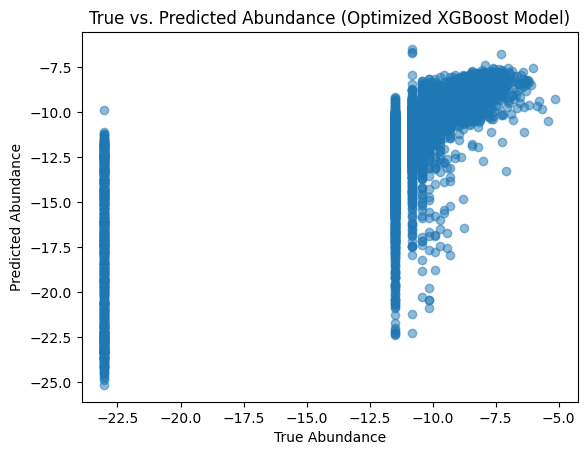

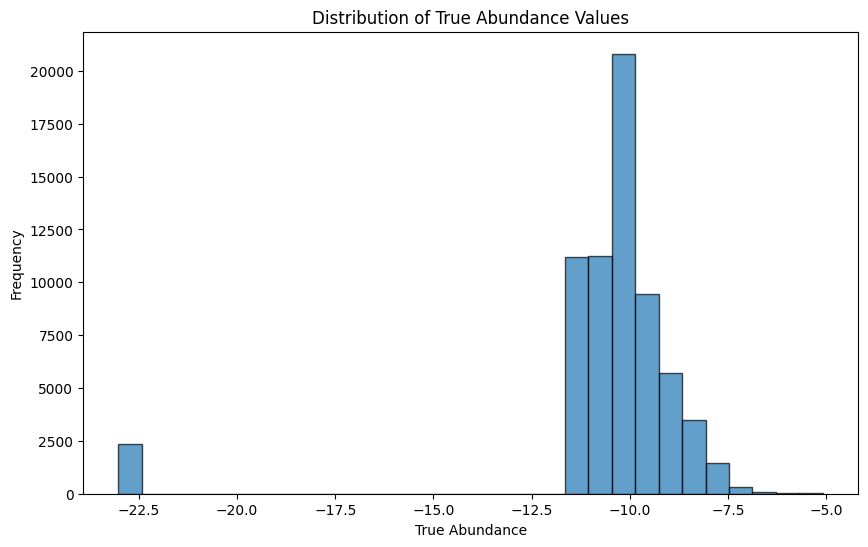

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor  # Make sure to install xgboost

df_abundance = pd.read_csv('data/species_abundance_filt.csv')
df_to_subset = pd.read_csv('data/organism_data_to_subset.csv')

# Initial data shapes
print(f"Shape of df_abundance: {df_abundance.shape}")
print(f"Shape of df_to_subset before dropping duplicates: {df_to_subset.shape}")

df_to_subset = df_to_subset.drop_duplicates(subset='Species of interest')
print(f"Shape of df_to_subset after dropping duplicates: {df_to_subset.shape}")

# Merge data
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)

# Shapes after merging
print(f"Shape of merged_data: {merged_data.shape}")

# Select features and target variable
features = merged_data[['soilTemp', 'soilInCaClpH', "n_samples", "soilMoisture"]].copy()
target = merged_data['percentage']

# Handle missing values (fill or drop)
print("Handling missing values by filling with mean...")
features = features.fillna(features.mean())
target = target.fillna(target.mean())
target = np.log(target + 1e-10)  # Apply log transformation to the target

# Train-test split
print("Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")

# Standardize features
print("Standardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Set up the parameter grid for optimization
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [3, 5, 7],                  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'subsample': [0.8, 1.0],                 # Subsample ratio
    'colsample_bytree': [0.8, 1.0],          # Fraction of features to be randomly sampled for each tree
    'gamma': [0, 1]                          # Minimum loss reduction to make a split
}

# Set up the GridSearchCV
print("Starting Grid Search for XGBoost...")
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R² score for evaluation
    n_jobs=-1,     # Use all available cores
    verbose=2      # Verbosity mode
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_r2_cv = grid_search.best_score_

print("\nBest Hyperparameters for XGBoost:", best_params)
print(f"Best R² Score from Cross-Validation: {best_r2_cv:.2f}")

# Evaluate the optimized model on the test set
print("Evaluating the optimized XGBoost model on the test set...")
y_pred_optimized = best_xgb_model.predict(X_test_scaled)
optimized_r2 = r2_score(y_test, y_pred_optimized)
optimized_mse = mean_squared_error(y_test, y_pred_optimized)

print(f"Test R²: {optimized_r2:.2f}")
print(f"Mean Squared Error: {optimized_mse:.2f}")

# Visualize predictions vs. true values
print("Visualizing predictions vs. true values...")
plt.scatter(y_test, y_pred_optimized, alpha=0.5)
plt.xlabel("True Abundance")
plt.ylabel("Predicted Abundance")
plt.title("True vs. Predicted Abundance (Optimized XGBoost Model)")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(target, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('True Abundance')
plt.ylabel('Frequency')
plt.title('Distribution of True Abundance Values')
plt.show()
